# Extra credit asisgnment jc7344

## LinkNYC, poverty and internet access disparity. 

### Research question:

**Are New Yorkers living in poverty, significantly more likely to be isolated from LinkNYC kiosk network, in comparison to New Yorkers living in low poverty?**

For this analysis, I formed the following hypotheses:

*Null Hypothesis:*
The mean distance to LinkNYC kiosks for New Yorkers living in poverty is the same or less than the mean distance to LinkNYC kiosks for New Yorkers in low poverty, significance level = 0.05.

*Alternative Hypothesis:*
The mean distance to LinkNYC kiosks for New Yorkers living in poverty is larger than the mean distance to LinkNYC kiosks for New Yorkers in low poverty, significance level = 0.05


In [274]:
%matplotlib inline
from __future__  import print_function, division
import numpy as np
from math import *
import pandas as pd
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from geopandas import GeoDataFrame
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gp
import zipfile
import glob
import pylab as pl
import statsmodels.api as sm
import os

In [275]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

## Downloading Census tract spatial data (cut to shoreline) from bytes of the big apple. 

In [276]:
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyct2000_16d.zip")
os.system("mv nyct2000_16d.zip" + os.getenv("PUIDATA"))

256

In [277]:
os.system("unzip " + os.getenv('PUIDATA') + '/' + "nyct2000_16d")

256

In [278]:
os.path.isfile(os.getenv("PUIDATA") + "/nyct2000_16d/nyct2000_16d/nyct2000.shp")

True

In [279]:
tracts = gp.read_file(os.getenv("PUIDATA")+ "/" + '/nyct2000_16d/nyct2000_16d/nyct2000.shp')

In [280]:
ctnyc_path="/home/cusp/jc7344/PUIdata/nyct2000_16d/nyct2000_16d/nyct2000.shp"
#/home/cusp/jc7344/PUIdata/nyct2000_16d/nyct2000_16d/nyct2000.shp
ct_shape = GeoDataFrame.from_file(ctnyc_path)

## Mapping Census tracts 

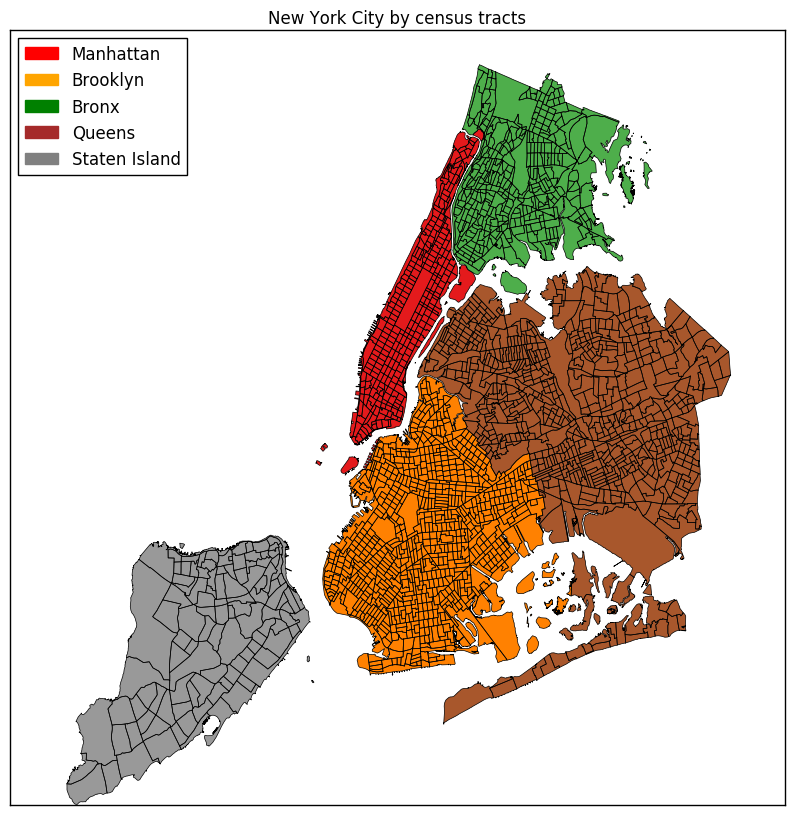

In [281]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("New York City by census tracts")
grey_patch = mpatches.Patch(color='grey', label='Staten Island')
green_patch = mpatches.Patch(color='green', label='Bronx')
red_patch = mpatches.Patch(color='red', label='Manhattan')
orange_patch = mpatches.Patch(color='orange', label='Brooklyn')
brown_patch = mpatches.Patch(color='brown', label='Queens')

plt.legend(handles=[red_patch, orange_patch, green_patch, brown_patch, grey_patch], loc = 'best')

The map above displays The City of New York. Each of the five boroughs were assigned a different color to clearly identify the census tract boundaries.

## Downloading LinkNYC location Map from NYC Open data

In [282]:
### Here I am using code provided by Professor Bianco.

def get_LinkNYC_csv(filename):
    '''
    Function that get the data file from the NYC Open Data websites and saves it in the PUIdata directory.
    If the file is already there, the function prints a message saying that. 
    '''
    
    print('Getting the data from NYC Open Data website')
    
    ### First check if the csv file is not already at the directory
    if os.path.isfile(os.getenv("PUIDATA") + "/" + filename):
        print ("File was already at the PUIdata directory.")
         
    else :
        # Download the File; move it to the PUIdata directory.
        print ("Downloading")
        
        # Downloading the File
        os.system("curl -O https://data.cityofnewyork.us/resource/" + filename)
        print ("File downloaded.")
        
        # Moving it to the PUIdata directory
        os.system("mv " + filename + " " + os.getenv("PUIDATA"))
        
                  
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + filename):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("File in place, you can continue.")

In [283]:
get_LinkNYC_csv('tgrn-h24f.csv')

Getting the data from NYC Open Data website
File was already at the PUIdata directory.
File in place, you can continue.


In [284]:
link = pd.read_csv(os.getenv("PUIDATA")+ "/" + 'tgrn-h24f.csv')

In [285]:
link.head()

,CB Link ID,Boro,Community Board,Latitude,Longitude,Link Installation Status,Smallest PPT,Street Address,Orientation (Facing Front of Kiosk),Boro ID,Construction Complete (A),Location
0,LINK-000067,Bronx,205,40.860215,-73.893060,A - Link Live,116218,2461 Webster Ave,108 E,NY-BX,04/28/2016 12:00:00 AM,"(40.860215, -73.89306)"
1,LINK-000070,Bronx,207,40.862644,-73.903244,A - Link Live,119564,48 W Fordham Rd,4 N,NY-BX,08/12/2016 12:00:00 AM,"(40.862644, -73.903244)"
2,LINK-000072,Bronx,205,40.861349,-73.898023,A - Link Live,119575,2437 Grand Concourse,100 E,NY-BX,06/27/2016 12:00:00 AM,"(40.861349, -73.898023)"
3,LINK-000074,Bronx,205,40.861655,-73.898581,A - Link Live,119587,150 E 188St,9 N,NY-BX,04/28/2016 12:00:00 AM,"(40.861655, -73.898581)"
4,LINK-000076,Bronx,205,40.859153,-73.898553,A - Link Live,119628,2366-2370 Grand Concourse,338 N,NY-BX,04/28/2016 12:00:00 AM,"(40.859153, -73.898553)"


In [286]:
cd = link['Community Board'].values
cd

array([205, 207, 205, 205, 205, 105, 105, 105, 105, 105, 105, 105, 105,
       105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 105, 103,
       103, 104, 102, 102, 103, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106, 106, 106, 106, 106, 106, 106, 108, 102, 104, 105, 104,
       104, 104, 104, 104, 105, 105, 104, 105, 105, 104, 104, 104, 104,
       104, 104, 104, 105, 104, 105, 104, 104, 105, 105, 104, 104, 105,
       104, 104, 104, 104, 104, 104, 104, 105, 102, 104, 105, 104, 104,
       104, 105, 105, 104, 105, 105, 104, 105, 104, 105, 104, 104, 104,
       104, 104, 105, 104, 104, 105, 412, 412, 412, 412, 412, 412, 412,
       412, 412, 412, 412, 412, 108, 108, 108, 108, 108, 108, 10

In [287]:
len(cd)

443

In [288]:
link.isnull().sum()

CB Link ID                              0
Boro                                    0
Community Board                         0
Latitude                                0
Longitude                               0
Link Installation Status                0
Smallest PPT                            0
Street Address                          0
Orientation (Facing Front of Kiosk)    24
Boro ID                                 0
Construction Complete (A)               0
Location                                0
dtype: int64

In [289]:
kioskid = link['CB Link ID'].values
kioskid

array(['LINK-000067', 'LINK-000070', 'LINK-000072', 'LINK-000074',
       'LINK-000076', 'LINK-000092', 'LINK-000111', 'LINK-000116',
       'LINK-000120', 'LINK-000130', 'LINK-000141', 'LINK-000151',
       'LINK-000155', 'LINK-000158', 'LINK-000162', 'LINK-000163',
       'LINK-000164', 'LINK-000165', 'LINK-000166', 'LINK-000168',
       'LINK-000173', 'LINK-000177', 'LINK-000178', 'LINK-000180',
       'LINK-000185', 'LINK-000189', 'LINK-000194', 'LINK-000198',
       'LINK-000199', 'LINK-000202', 'LINK-000223', 'LINK-000224',
       'LINK-000225', 'LINK-000227', 'LINK-000230', 'LINK-000231',
       'LINK-000232', 'LINK-000233', 'LINK-000235', 'LINK-000240',
       'LINK-000241', 'LINK-000242', 'LINK-000243', 'LINK-000251',
       'LINK-000252', 'LINK-000253', 'LINK-000254', 'LINK-000256',
       'LINK-000257', 'LINK-000258', 'LINK-000266', 'LINK-000267',
       'LINK-000269', 'LINK-000272', 'LINK-000273', 'LINK-000276',
       'LINK-000278', 'LINK-000284', 'LINK-000286', 'LINK-0002

In [290]:
kioskid2 = []
for elem in kioskid:
    kioskid2.append(int(elem[6:]))

In [291]:
print(type(kioskid2[0]))

<type 'int'>


In [292]:
link['CB Link ID'] = kioskid2
kioskid2

[67,
 70,
 72,
 74,
 76,
 92,
 111,
 116,
 120,
 130,
 141,
 151,
 155,
 158,
 162,
 163,
 164,
 165,
 166,
 168,
 173,
 177,
 178,
 180,
 185,
 189,
 194,
 198,
 199,
 202,
 223,
 224,
 225,
 227,
 230,
 231,
 232,
 233,
 235,
 240,
 241,
 242,
 243,
 251,
 252,
 253,
 254,
 256,
 257,
 258,
 266,
 267,
 269,
 272,
 273,
 276,
 278,
 284,
 286,
 287,
 292,
 297,
 298,
 302,
 303,
 304,
 306,
 308,
 309,
 310,
 313,
 315,
 316,
 317,
 320,
 327,
 328,
 331,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 349,
 350,
 351,
 352,
 355,
 357,
 359,
 360,
 361,
 362,
 363,
 364,
 366,
 369,
 447,
 453,
 458,
 462,
 464,
 465,
 466,
 468,
 469,
 472,
 473,
 475,
 480,
 483,
 484,
 486,
 487,
 489,
 491,
 493,
 496,
 498,
 499,
 501,
 503,
 505,
 508,
 511,
 513,
 516,
 518,
 522,
 524,
 525,
 527,
 528,
 529,
 531,
 532,
 533,
 535,
 537,
 538,
 539,
 540,
 541,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 558,
 560,
 562,
 563,
 566,
 567,
 568,
 569,
 780,
 781,
 784,
 785,
 789,
 793

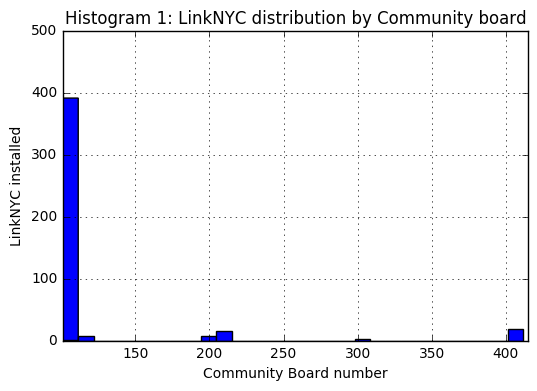

In [293]:
link_hist = link['Community Board'].hist(bins = 30)
plt.axis([101, 415, 0, 500])
link_hist.set_title("Histogram 1: LinkNYC distribution by Community board")
link_hist.set_xlabel("Community Board number")
link_hist.set_ylabel("LinkNYC installed")
#plt.text(1910, -30000, 'Age distribution of Citi Bike users excluding those who were born before 1910.', fontsize = 12)

The figure above displays 454 LinkNYC kiosks installed within the boundaries of 21 community board throughout New York City. As it was possible to see when exploring the data, there were 12 community boards with numbers from 101 to 112 correspond to Manhattan (410 installed kiosks); 5 community board with numbers from 204 to 208 were in the Bronx (with 23 installed kiosks); Brooklyn, on the other hand, was represented by community board 303 (with two LinkNYC kiosks installed in Bedford Stuyvesant), and 3 community boards with numbers from 406 to 412 in Queens. 


## Downloading Internet Use and and Demographic data from the class website

The dataset contains household internet access information by community board. For the purpose of my project, internet access will depend exclusively on the presence Households: With A Internet Subscription. My objective here is to identify a correlation between internet subscriptions and median household income. This will allow me to share more details of the existing connectivity conditions.

In [294]:
!curl -O "http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14673  100 14673    0     0   885k      0 --:--:-- --:--:-- --:--:-- 1102k


In [295]:
os.system("mv ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv" + os.getenv("PUIDATA"))

256

In [296]:
internet = pd.read_csv(os.getenv("PUIDATA")+ "/" + 'ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv')

In [297]:
internet.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [298]:
print(len(internet))

59


In [299]:
internet.isnull().sum()

FIPS                                                       0
Geographic Identifier                                      0
Qualifying Name                                            0
Households                                                 0
Households: With An Internet Subscription                  0
Households: Dial-Up Alone                                  0
Households: Dsl                                            0
Households: With Mobile Broadband                          0
Households: Without Mobile Broadband                       0
Households: Cable Modem                                    0
Households: With Mobile Broadband.1                        0
Households: Without Mobile Broadband.1                     0
Households: Fiber-Optic                                    0
Households: With Mobile Broadband.2                        0
Households: Without Mobile Broadband.2                     0
Households: Satellite Internet Service                     0
Households: With Mobile 

In [300]:
internet.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [301]:
internet = internet.replace(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper East Side PUMA, New York',
       'NYC-Manhattan Community District 7--Upper West Side & West Side PUMA, New York',
       'NYC-Manhattan Community District 4 & 5--Chelsea, New York',
       'NYC-Manhattan Community District 6--Murray Hill, New York',
       'NYC-Manhattan Community District 3--Chinatown & Lower East Side PUMA, New York',
       'NYC-Manhattan Community District 1 & 2--Battery Park City, New York',
       'NYC-Staten Island Community District 3--Tottenville, New York',
       'NYC-Staten Island Community District 2--New Springville & South Beach PUMA, New York',
       'NYC-Staten Island Community District 1--Port Richmond, New York',
       'NYC-Brooklyn Community District 1--Greenpoint & Williamsburg PUMA, New York',
       'NYC-Brooklyn Community District 4--Bushwick PUMA, New York',
       'NYC-Brooklyn Community District 3--Bedford-Stuyvesant PUMA, New York',
       'NYC-Brooklyn Community District 2--Brooklyn Heights & Fort Greene PUMA, New York',
       'NYC-Brooklyn Community District 6--Park Slope, New York',
       'NYC-Brooklyn Community District 8--Crown Heights North & Prospect Heights PUMA, New York',
       'NYC-Brooklyn Community District 16--Brownsville & Ocean Hill PUMA, New York',
       'NYC-Brooklyn Community District 5--East New York & Starrett City PUMA, New York',
       'NYC-Brooklyn Community District 18--Canarsie & Flatlands PUMA, New York',
       'NYC-Brooklyn Community District 17--East Flatbush, New York',
       'NYC-Brooklyn Community District 9--Crown Heights South, New York',
       'NYC-Brooklyn Community District 7--Sunset Park & Windsor Terrace PUMA, New York',
       'NYC-Brooklyn Community District 10--Bay Ridge & Dyker Heights PUMA, New York',
       'NYC-Brooklyn Community District 12--Borough Park, New York',
       'NYC-Brooklyn Community District 14--Flatbush & Midwood PUMA, New York',
       'NYC-Brooklyn Community District 15--Sheepshead Bay, New York',
       'NYC-Brooklyn Community District 11--Bensonhurst & Bath Beach PUMA, New York',
       'NYC-Brooklyn Community District 13--Brighton Beach & Coney Island PUMA, New York',
       'NYC-Queens Community District 1--Astoria & Long Island City PUMA, New York',
       'NYC-Queens Community District 3--Jackson Heights & North Corona PUMA, New York',
       'NYC-Queens Community District 7--Flushing, New York',
       'NYC-Queens Community District 11--Bayside, New York',
       'NYC-Queens Community District 13--Queens Village, New York',
       'NYC-Queens Community District 8--Briarwood, New York',
       'NYC-Queens Community District 4--Elmhurst & South Corona PUMA, New York',
       'NYC-Queens Community District 6--Forest Hills & Rego Park PUMA, New York',
       'NYC-Queens Community District 2--Sunnyside & Woodside PUMA, New York',
       'NYC-Queens Community District 5--Ridgewood, New York',
       'NYC-Queens Community District 9--Richmond Hill & Woodhaven PUMA, New York',
       'NYC-Queens Community District 12--Jamaica, New York',
       'NYC-Queens Community District 10--Howard Beach & Ozone Park PUMA, New York',
       'NYC-Queens Community District 14--Far Rockaway, New York'], ['BX08', 'BX12', 'BX10', 'BX11', 'BX06', 'BX07', 'BX05', 'BX04', 'BX09', 'BX02',
'MN12', 'MN09', 'MN10', 'MN11', 'MN08', 'MN07', 'MN04', 'MN06', 'MN03', 'MN01',
'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06', 'BK08', 'BK16', 'BK05', 'BK18',
'BK17', 'BK09', 'BK07', 'BK10', 'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09', 'QN12', 'QN10', 'QN14'])

In [302]:
internet = internet.rename(columns={'Qualifying Name': 'Community district'})

In [303]:
internet.head()

,FIPS,Geographic Identifier,Community district,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,BX08,42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,BX12,44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,BX10,47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,BX11,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,BX06,57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [304]:
internet['Community district'].drop_duplicates().as_matrix()
print(len(internet['Community district'].drop_duplicates().as_matrix()))

55


In [305]:
house_int = internet.iloc[:,[2,4]]

In [306]:
house_int.columns

Index([u'Community district', u'Households: With An Internet Subscription'], dtype='object')

In [307]:
house_int['Households: With An Internet Subscription'] = house_int.sum(axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [308]:
house_int.head()

,Community district,Households: With An Internet Subscription
0,BX08,31795
1,BX12,32243
2,BX10,32729
3,BX11,32003
4,BX06,35503


In [309]:
final_demo = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")

In [310]:
final_demo.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [311]:
final_demo.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [312]:
cd_id = final_demo['cd_id'].drop_duplicates().as_matrix()

In [313]:
cd_id

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [314]:
final_demo = final_demo.replace(['MN11111'], ['MN11'])

In [315]:
print(len(cd_id))

59


In [316]:
final_demo = final_demo.iloc[:,[1, 139]]
final_demo = final_demo.rename(columns={'Median household income (In 2014 Inflation Adjusted Dollars)': 'Median Household Income', 'cd_id': 'Community district'})
final_demo.head()

,Community district,Median Household Income
0,BX08,54224
1,BX12,44906
2,BX10,54962
3,BX11,47910
4,BX03,22041


In [317]:
access = pd.merge(final_demo, house_int, on='Community district')

In [318]:
access.head()

,Community district,Median Household Income,Households: With An Internet Subscription
0,BX08,54224,31795
1,BX12,44906,32243
2,BX10,54962,32729
3,BX11,47910,32003
4,BX06,22041,35503


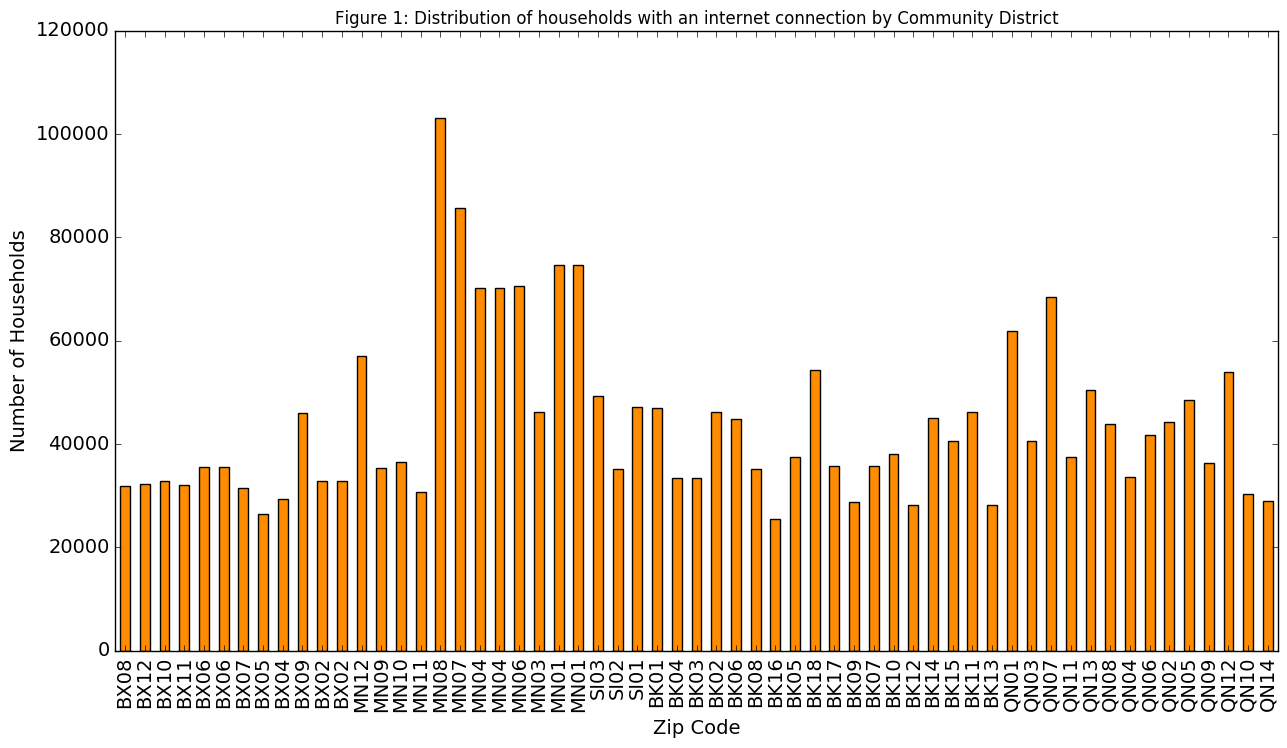

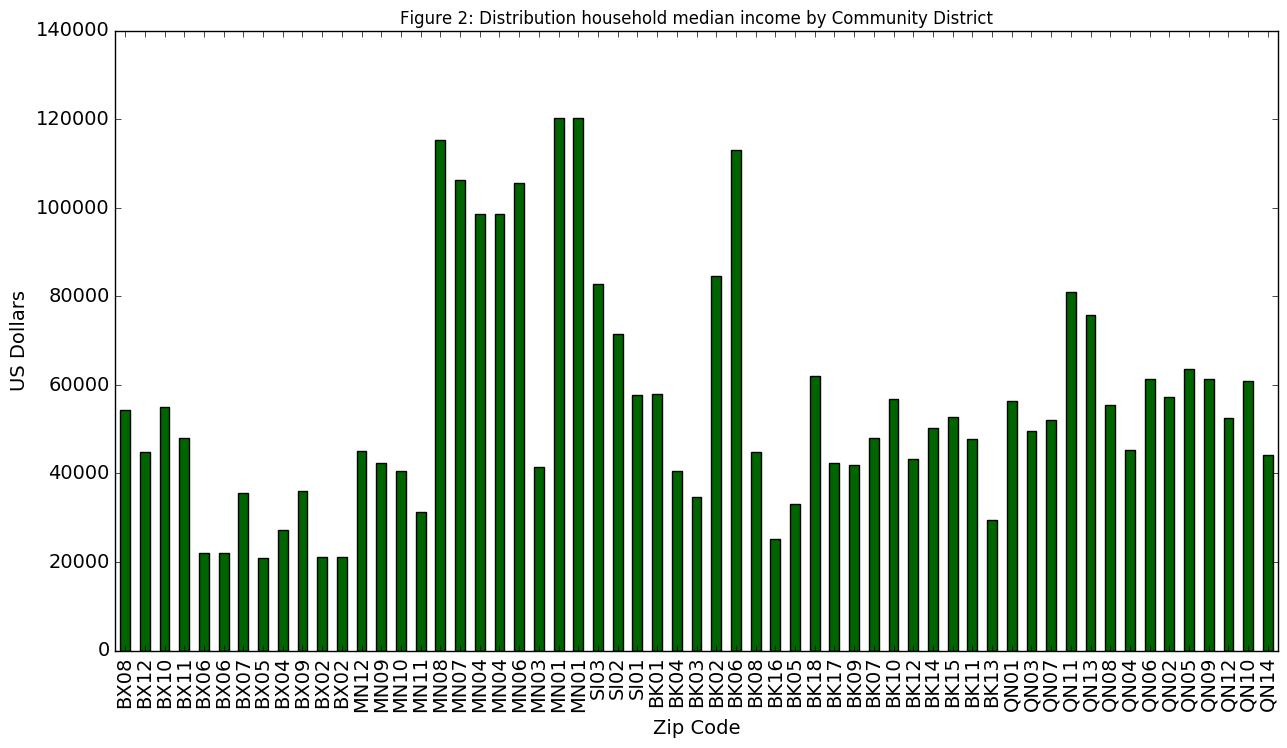

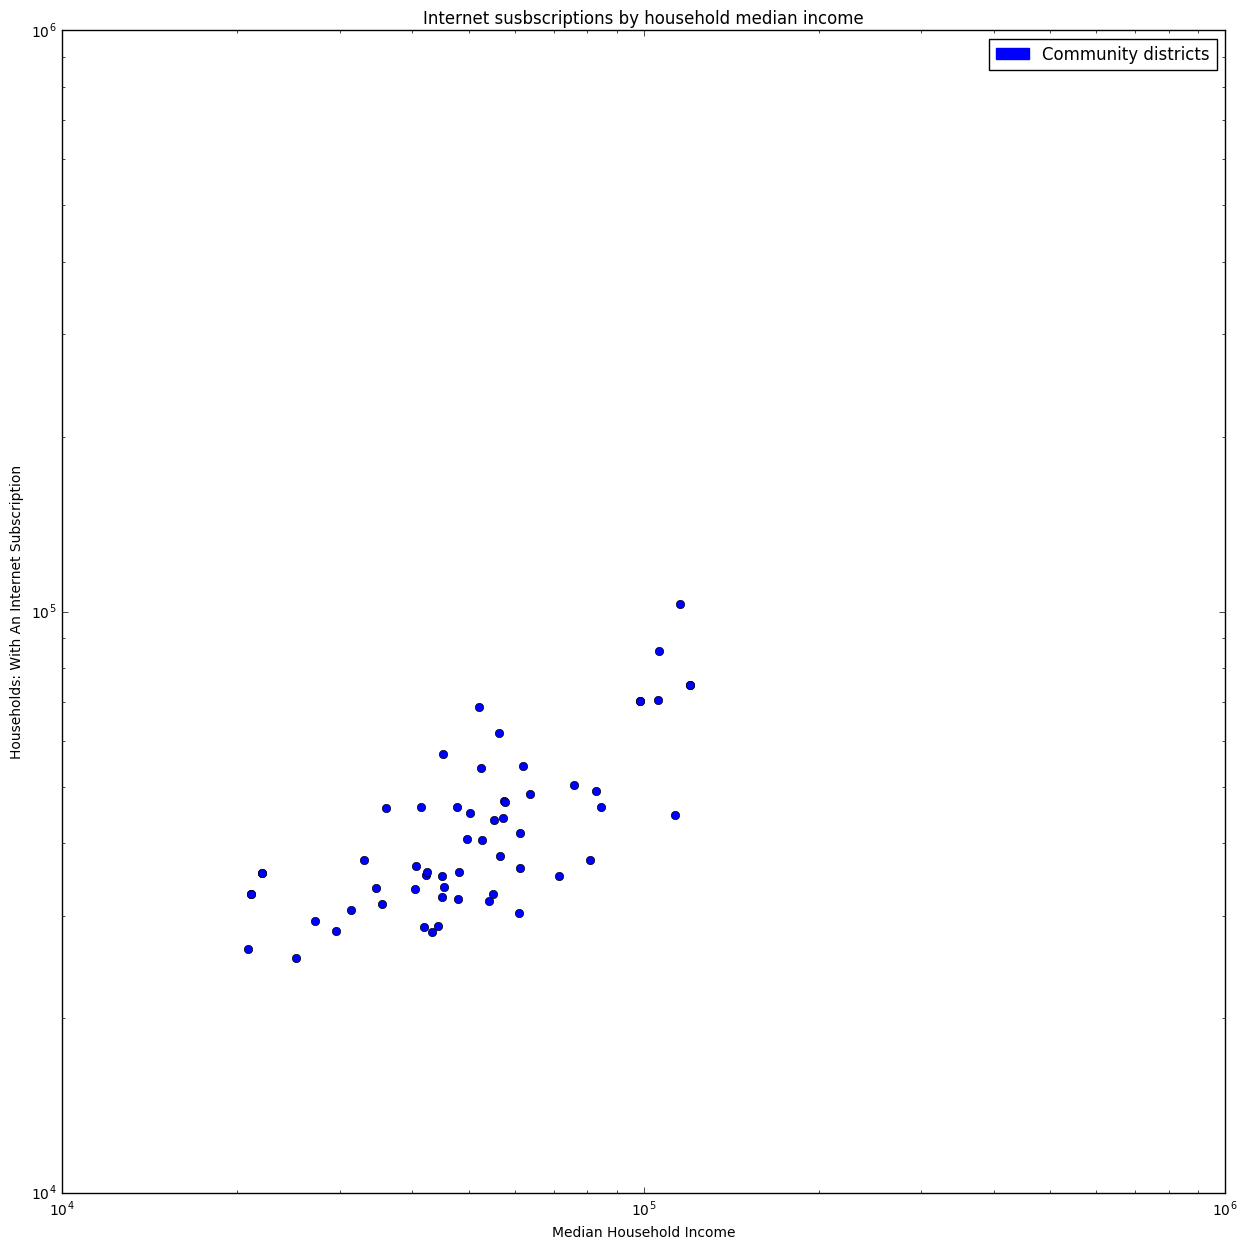

In [319]:
ax = access.plot(x='Community district', y='Households: With An Internet Subscription', kind='bar', figsize=(15, 8), legend=False, fontsize=14, color='DarkOrange')
ax.set_title('Figure 1: Distribution of households with an internet connection by Community District')
ax.set_ylabel('Number of Households', fontsize=14)
ax.set_xlabel('Zip Code', fontsize=14)

ax1 = access.plot(x='Community district', y='Median Household Income', kind='bar', figsize=(15, 8), legend=False, fontsize=14, color='DarkGreen')
ax1.set_title('Figure 2: Distribution household median income by Community District')
ax1.set_ylabel('US Dollars', fontsize=14)
ax1.set_xlabel('Zip Code', fontsize=14)

plt.figure(figsize=(15,15))
plt.loglog(access['Median Household Income'], access['Households: With An Internet Subscription'], 'o')
plt.ylabel("Households: With An Internet Subscription")
plt.xlabel("Median Household Income")
plt.title("Internet susbscriptions by household median income")
blue_patch = mpatches.Patch(color='blue', label='Community districts')
plt.legend(handles=[blue_patch], loc = 'best')


The figures above display both the number of households with an internet subscription and their median income. There seems to be a relationship between higher (median) income and the household’s capacity to connect to the internet. Additionally, a relationship between the amount of internet subscriptions and the number of installed linkNYC kiosks (‘Links”) is not evident on the community district level. Manhattan is the borough with the most amount of internet subscriptions per household (specifically, the community districts 08, 07, 01). Ironically, these community districts have 120 LinkNYC kiosks which represents 26% of the total installed “links” in the city. 

Conversely, digitally isolated (in terms of LinkNYC presence) boroughs like the Bronx and Brooklyn display the least number of households with internet connections. Although the apparent positive relationship between median income and internet access, can be seen on both sides of the spectrum, it is possible to say that the disposition of LinkNYC kiosks seems to be more connected to the presence of households with higher income than to the situation of lower income and unconnected segments of the population. 



## Processing of poverty data and mapping on ArcGIS 

In order to answer my research question I have to merge tabular and spatial data. For my project, I am using poverty by census tract data provided by Census bureau for the year 2014 and census tract clipped to shoreline shapefile downloaded from the agency’s cartographic boundary archives. 



In [320]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

In [321]:
poverty = pd.read_csv(os.getenv("PUIDATA")+ "/" + 'ACS_14_5YR_S1701_with_a.csv')

In [322]:
poverty.head()

,GEO.id2,Total; Estimate; Population for whom poverty status is determined,Below poverty level; Estimate; Population for whom poverty status is determined
0,36005000100,0,0
1,36005000200,5073,974
2,36005000400,5560,646
3,36005001600,5158,986
4,36005001900,2520,1123


In [323]:
poverty = poverty.rename(columns={'GEO.id2': 'GEOID'})
poverty.head()

,GEOID,Total; Estimate; Population for whom poverty status is determined,Below poverty level; Estimate; Population for whom poverty status is determined
0,36005000100,0,0
1,36005000200,5073,974
2,36005000400,5560,646
3,36005001600,5158,986
4,36005001900,2520,1123


In [324]:
poverty = poverty.rename(columns={'Total; Estimate; Population for whom poverty status is determined': 'Total_Pop'})
poverty.head()

,GEOID,Total_Pop,Below poverty level; Estimate; Population for whom poverty status is determined
0,36005000100,0,0
1,36005000200,5073,974
2,36005000400,5560,646
3,36005001600,5158,986
4,36005001900,2520,1123


In [325]:
poverty = poverty.rename(columns={'Below poverty level; Estimate; Population for whom poverty status is determined': 'Total_Pov'})
poverty.head()

,GEOID,Total_Pop,Total_Pov
0,36005000100,0,0
1,36005000200,5073,974
2,36005000400,5560,646
3,36005001600,5158,986
4,36005001900,2520,1123


In [326]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

In [327]:
os.path.isfile(os.getenv("PUIDATA") + "/shapez/cb_2015_36_tract_500k.shp")

True

In [328]:
shape = gp.read_file(os.getenv("PUIDATA")+ "/" + '/shapez/cb_2015_36_tract_500k.shp')

In [329]:
shape.columns

Index([u'AFFGEOID',    u'ALAND',   u'AWATER', u'COUNTYFP',    u'GEOID',
           u'LSAD',     u'NAME',  u'STATEFP',  u'TRACTCE', u'geometry'],
      dtype='object')

In [330]:
shape.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
0,1400000US36001000502,777446,0,001,36001000502,CT,5.02,36,000502,"POLYGON ((-73.79496 42.66871, -73.790798999999..."
1,1400000US36001013507,5575232,2491,001,36001013507,CT,135.07,36,013507,"POLYGON ((-73.802734 42.763943, -73.796492 42...."
2,1400000US36001014612,3072859,243,001,36001014612,CT,146.12,36,014612,"POLYGON ((-74.045469 42.711973, -74.0415709999..."
3,1400000US36001014803,149682672,1926625,001,36001014803,CT,148.03,36,014803,"POLYGON ((-74.11678499999999 42.551517, -74.09..."
4,1400000US36003940200,1528842,26577,003,36003940200,CT,9402,36,940200,"POLYGON ((-78.309316 42.231684, -78.309145 42...."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8375719d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8375949390>]], dtype=object)

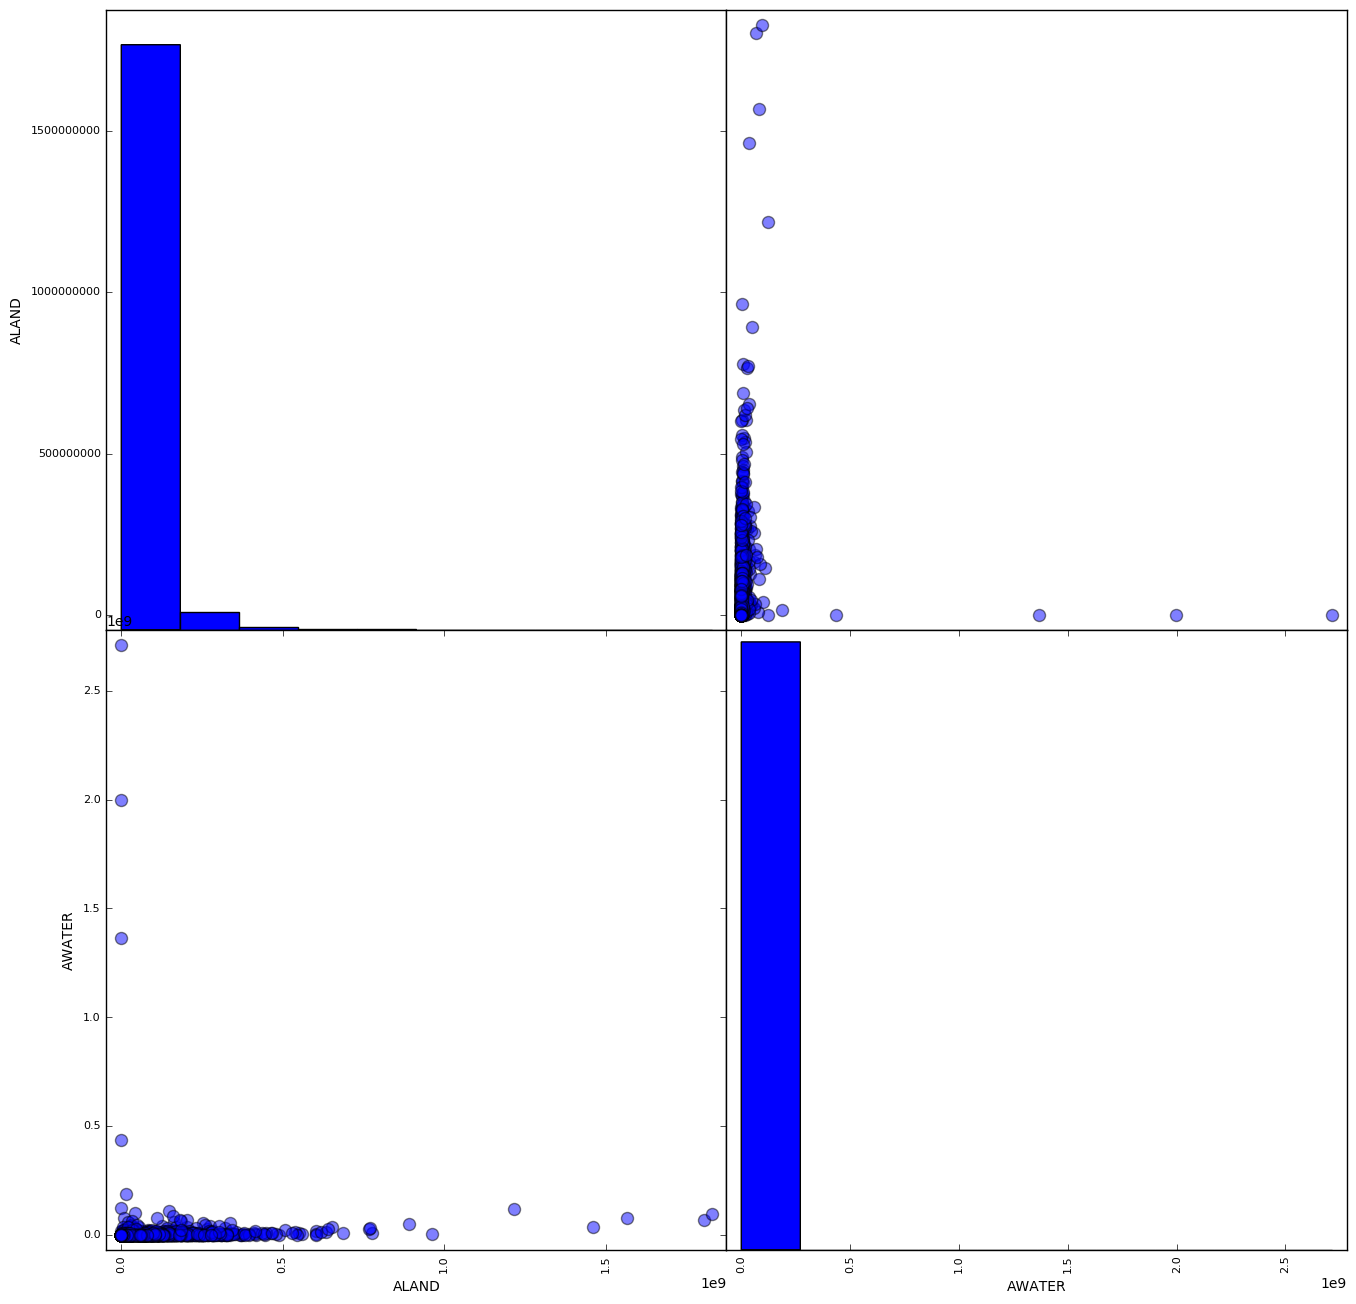

In [331]:
scatter_matrix (shape, s=300, figsize=(16, 16),)

In order to merge poverty data by census tract to the shapefile, it is crucial to make sure all of the values can be converted into float

In [332]:
len(shape)

4906

In [333]:
#Here I am using Professor Bianco's code
def canconvert(mydata):
    try:
        float(mydata)
        return True
    except ValueError:
        return False

indx = (np.vectorize(canconvert)(shape['ALAND']))
print("True entries %d"%sum(indx))
shape['ALAND'][~indx] = float('NaN')

indx2 = (np.vectorize(canconvert)(shape['AWATER']))
print("True entries %d"%sum(indx))
shape['AWATER'][~indx2] = float('NaN')

indx3 = (np.vectorize(canconvert)(shape['GEOID']))
print("True entries %d"%sum(indx))
shape['GEOID'][~indx3] = float('NaN')


True entries 4906
True entries 4906


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


True entries 4906


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [334]:
try:
    shape['ALAND'].astype(float)
except ValueError:
    print("conversion failed")

In [335]:
shape['GEOID'] = \
            pd.to_numeric(shape['GEOID'], 
                          errors='coerce').astype(float)

In [336]:
shape['GEOID']

0       3.600100e+10
1       3.600101e+10
2       3.600101e+10
3       3.600101e+10
4       3.600394e+10
5       3.600500e+10
6       3.600500e+10
7       3.600500e+10
8       3.600500e+10
9       3.600501e+10
10      3.600501e+10
11      3.600501e+10
12      3.600501e+10
13      3.600502e+10
14      3.600502e+10
15      3.600502e+10
16      3.600502e+10
17      3.600502e+10
18      3.600502e+10
19      3.600502e+10
20      3.600503e+10
21      3.600503e+10
22      3.600503e+10
23      3.600503e+10
24      3.600504e+10
25      3.600504e+10
26      3.600504e+10
27      3.600504e+10
28      3.600504e+10
29      3.600504e+10
            ...     
4876    3.606502e+10
4877    3.606503e+10
4878    3.606503e+10
4879    3.606700e+10
4880    3.606700e+10
4881    3.606701e+10
4882    3.611900e+10
4883    3.611900e+10
4884    3.611901e+10
4885    3.611901e+10
4886    3.611901e+10
4887    3.611901e+10
4888    3.611901e+10
4889    3.611901e+10
4890    3.611901e+10
4891    3.602901e+10
4892    3.602

In [337]:
proxim = pd.merge(poverty, shape, on='GEOID')

In [338]:
proxim

,GEOID,Total_Pop,Total_Pov,AFFGEOID,ALAND,AWATER,COUNTYFP,LSAD,NAME,STATEFP,TRACTCE,geometry
0,36005000100,0,0,1400000US36005000100,1677210,1035011,005,CT,1,36,000100,"POLYGON ((-73.892504 40.801206, -73.872264 40...."
1,36005000200,5073,974,1400000US36005000200,479463,852046,005,CT,2,36,000200,"POLYGON ((-73.865218 40.814529, -73.864255 40...."
2,36005000400,5560,646,1400000US36005000400,770689,690794,005,CT,4,36,000400,"POLYGON ((-73.85870299999999 40.815405, -73.85..."
3,36005001600,5158,986,1400000US36005001600,485079,0,005,CT,16,36,001600,"POLYGON ((-73.862464 40.819247, -73.861531 40...."
4,36005001900,2520,1123,1400000US36005001900,1668013,1143135,005,CT,19,36,001900,"POLYGON ((-73.930938 40.808253, -73.929219 40...."
5,36005002000,8933,3763,1400000US36005002000,395564,0,005,CT,20,36,002000,"POLYGON ((-73.87050099999999 40.820364, -73.86..."
6,36005002300,4827,2724,1400000US36005002300,104645,0,005,CT,23,36,002300,"POLYGON ((-73.929219 40.80956399999999, -73.92..."
7,36005002400,0,0,1400000US36005002400,675911,263388,005,CT,24,36,002400,"POLYGON ((-73.880546 40.818468, -73.879769 40...."
8,36005002500,5130,2981,1400000US36005002500,127492,0,005,CT,25,36,002500,"POLYGON ((-73.92383699999999 40.807809, -73.92..."
9,36005002701,3172,1772,1400000US36005002701,82641,0,005,CT,27.01,36,002701,"POLYGON ((-73.917964 40.806116, -73.917479 40...."


## Mapping on ArcGIS

After processing and merging both tabular and spatial data, I used ArcGIS to map the current locations of installed LinkNYC kiosks.  Additionally, I created a 1/2mile buffer (which I defined as “walking distance”) around kiosks and analyze the percentage of the population in poverty living in a walking distance from the nearest kiosk. Lastly, I generated centroids on the current location of LinkNYC kiosk to identify the average distance (in US feet) to residential units located in low and high poverty census tracts.

1) Currently installed LinkNYC kiosks.

2) 1/2 mile buffer around installed LinkNYC kiosks (percentage of population below poverty living in walking distance from their nearest LinkNYC kiosk.

3) Spatial analysis (average distance)


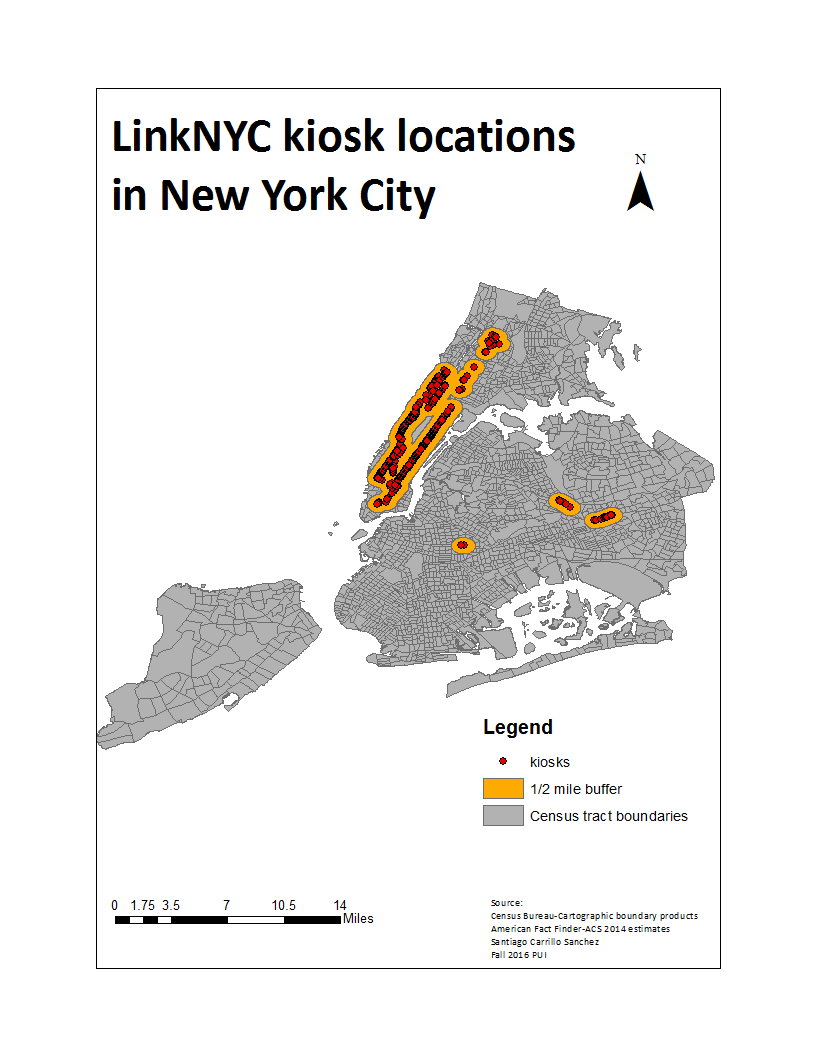

In [339]:
from IPython.core.display import Image, display
display(Image(os.getenv("PUIDATA") + '/pui map.png'), width=900, unconfined=True)

The map above illustrates the currently installed LinkNYC kiosk throughout New York City. Out of the originally planned installation scheme (replacing 7,000 phone booths with ‘Links”), the public/private partnership has placed a total of 456 kiosks. The self-funded project has presence in four boroughs and Manhattan hosts 90% of the installed links. 

After mapping the information, a preliminary analysis suggested that out of the total population below poverty, only 27% New Yorkers live within walking distance of a LinkNYC kiosk. 

<table>
  <thead>
    <tr>
        <th>Total population below poverty</th>
      <th>Percentage</th>
    <tr>
      <td>1,696,394</td>
      <td>100%</td>
    </tr>
      <th>Population below poverty living within 1/2 mile to a LinkNYC kiosk</th>
      <th>Percentage</th>
  </thead>
  <tbody>
    <tr>
      <td>460,683</td>
      <td>27%</td>
    </tr>
  </tbody>
</table>

In terms of the total population of New York City, it could be said that only 6% of residents live within walking distance from a LinkNYC  kiosk.


<table>
  <thead>
    <tr>
        <th>Total population of NYC</th>
      <th>Percentage</th>
    <tr>
      <td>8,219,906</td>
      <td>100%</td>
    </tr>
      <th>Population below poverty living within 1/2 mile to a LinkNYC kiosk</th>
      <th>Percentage</th>
  </thead>
  <tbody>
    <tr>
      <td>460,683</td>
      <td>6%</td>
    </tr>
  </tbody>
</table>



## Spatial Analysis-Average (linear) distance

For this portion of the project, the average linear distance between households and LinkNYC kiosks was calculated by identifying residential units for each borough. Having the results of previous analysis in hand, it was possible to establish a relationship between the census tracts with lower median income, high poverty and low connectivity (measured by calculating the number of internet subscriptions) and the hosting boroughs. In order to calculate the average distance within the boundaries of each MapPLUTO, the residential units were seen as centroids and a proximity analysis tool (geoprocessing tools) was utilized to identify the linear distance between selected residential units and LinkNYC kiosks. 

For the purpose of this project, Manhattan contains most of the community districts whose households have higher median income, whose population by census tract has lower poverty levels and has most the internet subscriptions. Additionally, Manhattan is also the borough with the most installed LinkNYC kiosks and with the largest share of population within a walking distance from them. Conversely, Brooklyn has the least number of installed kiosks, its community districts contain households with lower median income and the least number of internet subscriptions. 

Lastly, and as a final assumption, it is necessary to state that all distances will be calculated  according to the Euclidean metric (straight line) and measured in miles. 

Below, the proximity analysis for all the boroughs with LinkNYC presence will be displayed:

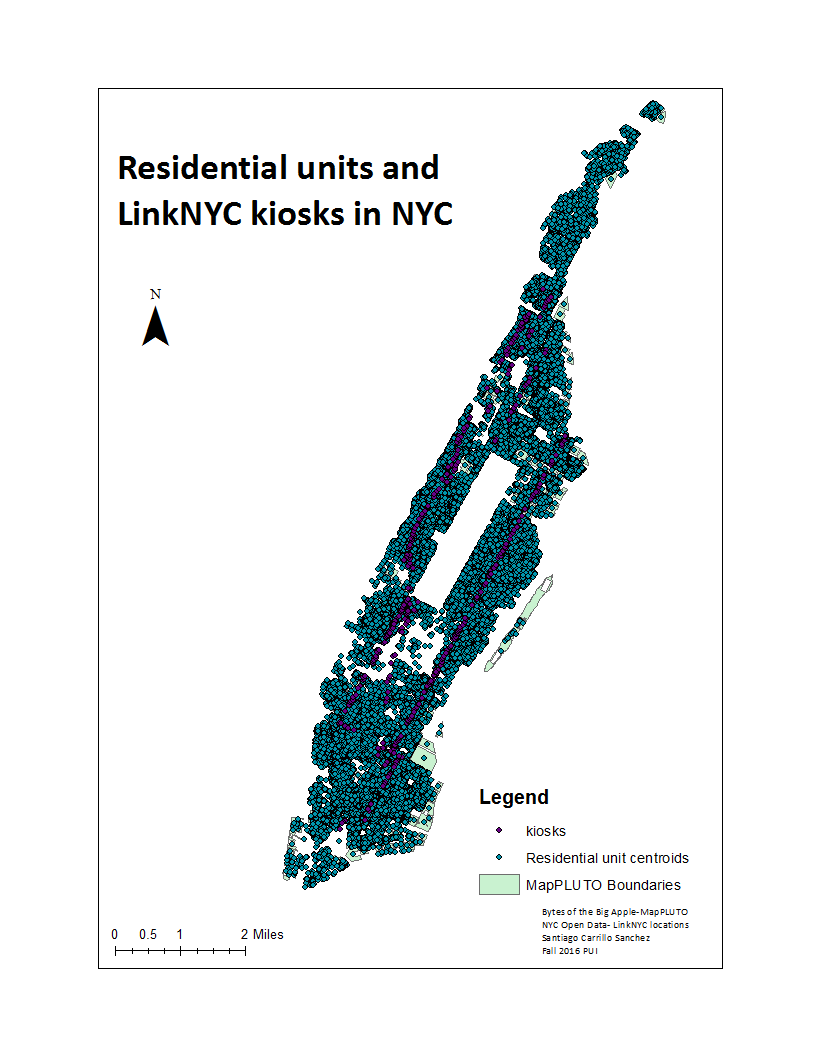

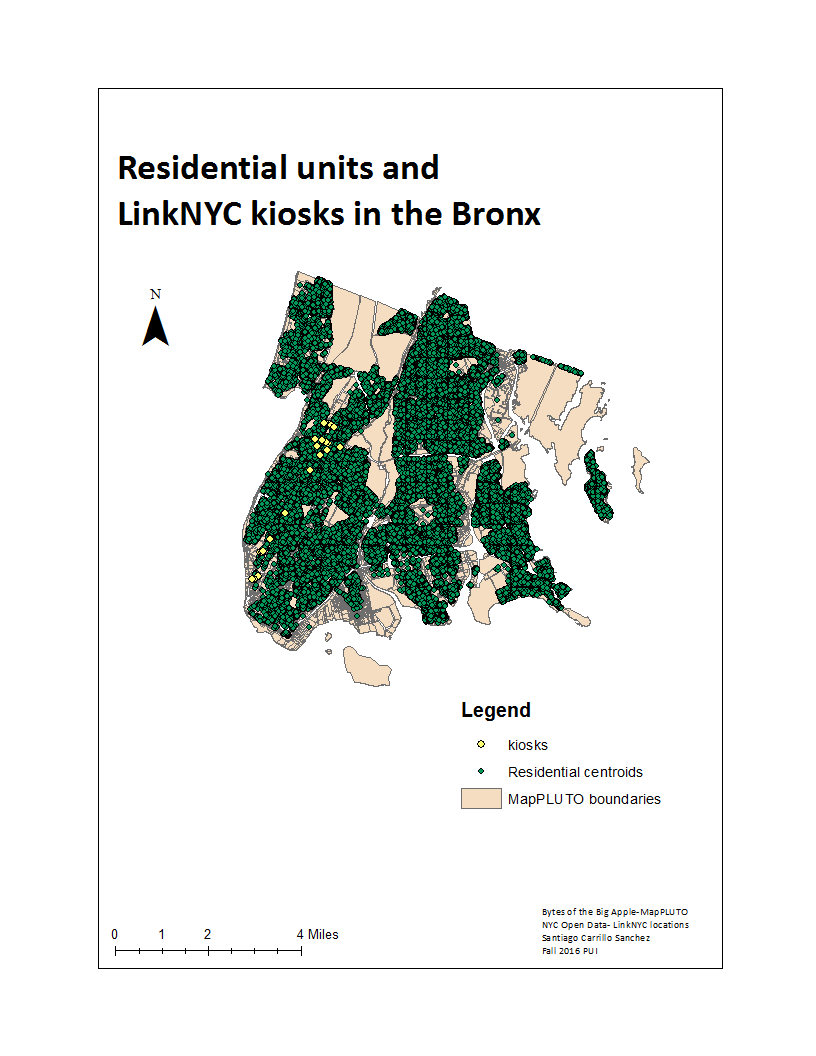

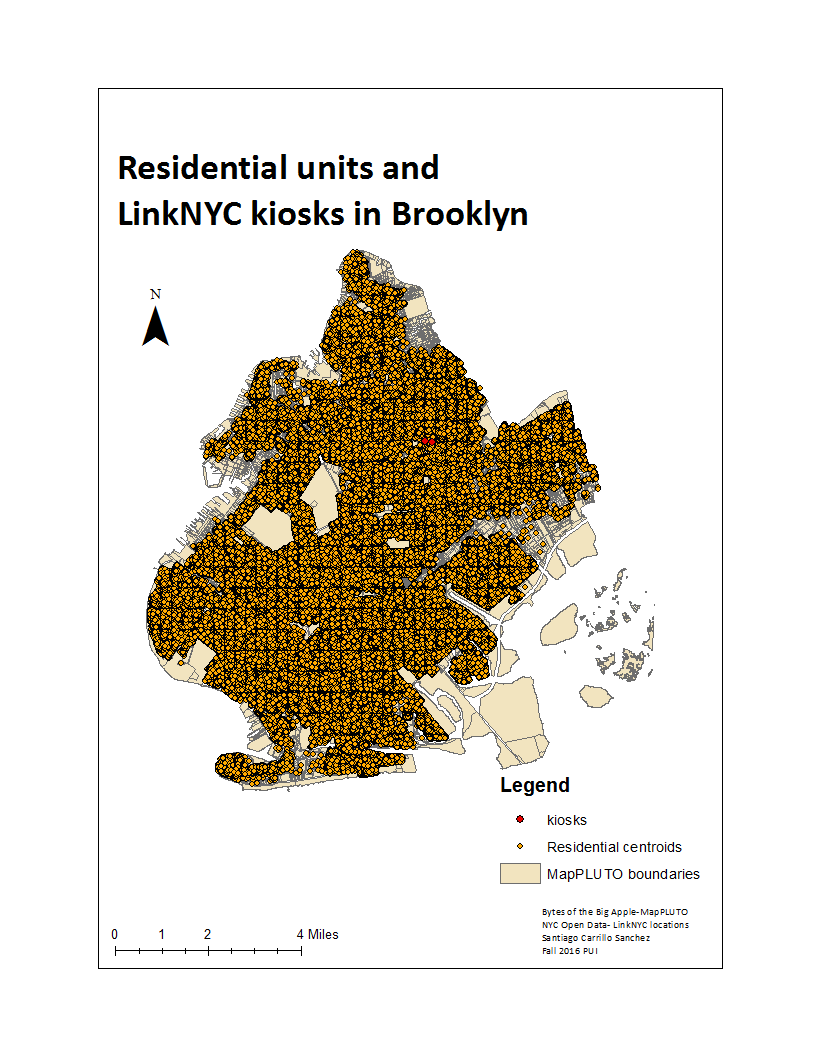

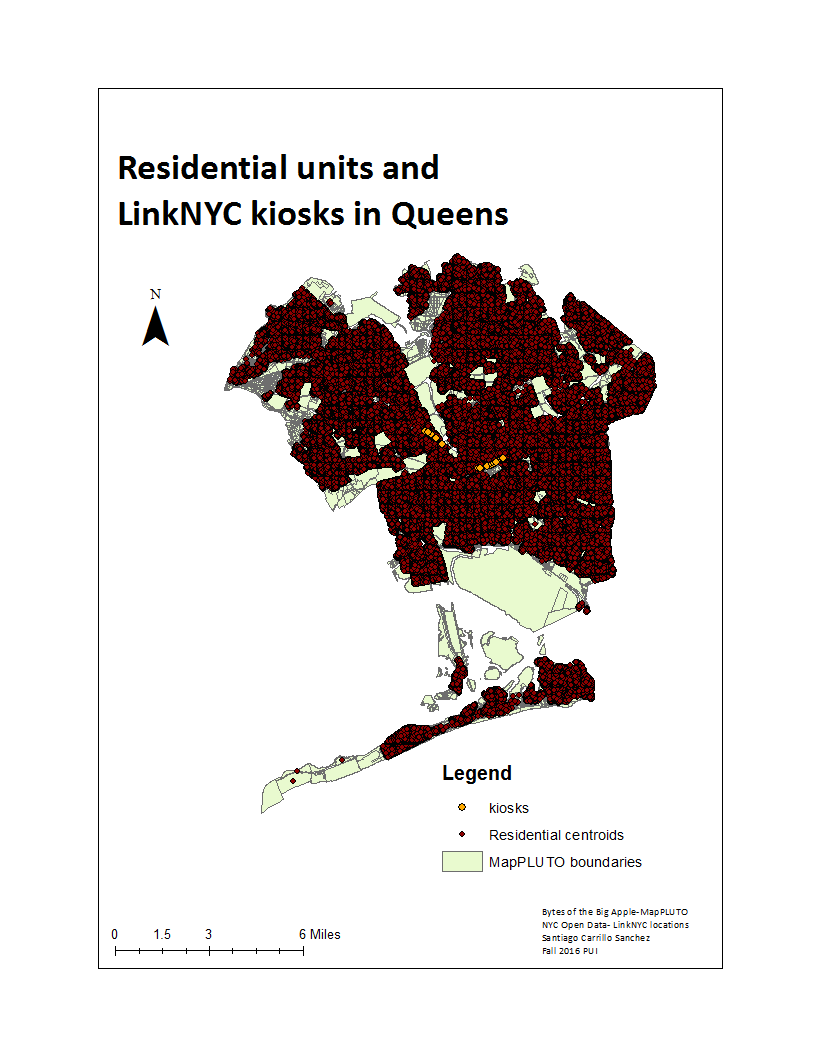

In [340]:
display(Image(os.getenv("PUIDATA") + '/PuiMap2.png'), width=900, unconfined=True)
display(Image(os.getenv("PUIDATA") + '/PuiMap3.png'), width=900, unconfined=True)
display(Image(os.getenv("PUIDATA") + '/PuiMap4.png'), width=900, unconfined=True)
display(Image(os.getenv("PUIDATA") + '/PuiMap5.png'), width=900, unconfined=True)


As result of my calculations, Manhattan is the borough with the shortest average distance between its residential units and LinkNYC kiosks with 0.25 miles (0.25 miles shorter than the walking distance). Brooklyn’ residential units are the most distant to the closest LinkNYC kiosk with 3.7 miles. 

<table>
  <thead>
    <tr>
        <th>Borough</th>
      <th>Average distance to LinkNYC kiosk</th>
    <tr>
      <td>Manhattan</td>
      <td>13.26 ft/0.25 miles</td>
    </tr>
    <th>Borough</th>
      <th>Average distance to LinkNYC kiosk in miles</th>
    <tr>
      <td>Bronx</td>
      <td>12,672 ft/2.4 miles</td>
    </tr>
      <th>Borough</th>
      <th>Average distance to LinkNYC kiosk in miles</th>
    <tr>
      <td>Brooklyn</td>
      <td>19,524 ft/3.7 miles</td>
    </tr>
      <th>Borough</th>
      <th>Average distance to LinkNYC kiosk in miles</th>
  </thead>
  <tbody>
    <tr>
      <td>Queens</td>
      <td>16,368 ft/3.1 miles</td>
    </tr> 
  </tbody>
</table>

## Hypothesis testing:

As deliverables for my project, I submit a statistical result which was produced after performing a Z-test. Additionally, I include various plots, tables and graphs supporting the result of my analysis and the possible rejection of the Null Hypothesis. Lastly, I will deliver a map displaying both a spatial diagnosis of existing conditions and the future locations of LinkNYC kiosks. My intention is to translate technical language into succinct information in order to facilitate decision-making and promote participatory planning in the City.


In [341]:
# low_pov corresponds to the average distance between residential units and LinkNYC kiosks within low poverty census tracts.
low_pov = pd.read_csv(os.getenv("PUIDATA")+ "/" + 'Table.csv')

In [342]:
low_pov.head()

,OBJECTID,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,NEAR_DIST
0,1,MN,15,7501,101,13.00,2005,2,1,10004,5288.566260
1,2,MN,16,7513,101,317.04,4006,2,1,10004,5630.897883
2,3,MN,30,1,101,9.00,1012,2,1,10004,5003.823372
3,4,MN,31,7501,101,7.00,1018,2,1,10005,4289.527743
4,5,MN,29,47,101,9.00,1010,2,1,10004,4751.813207


In [343]:
low_pov.drop(['OBJECTID', 'Borough', 'Block',
       'Lot', 'CD',
       'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode'], axis = 1, inplace = True)

In [344]:
low_pov.head()

,NEAR_DIST
0,5288.566260
1,5630.897883
2,5003.823372
3,4289.527743
4,4751.813207


In [345]:
mean_low = low_pov.mean()

In [346]:
mean_low

NEAR_DIST    1326.33303
dtype: float64

In [347]:
stdlow = low_pov.std()

In [348]:
low_pov.std()

NEAR_DIST    1232.00778
dtype: float64

In [349]:
# high_pov corresponds to the average distance between residential units and LinkNYC kiosks within high poverty census tracts.
high_pov = pd.read_csv(os.getenv("PUIDATA")+ "/" + 'Table_2.csv')

In [350]:
high_pov.head()

,OBJECTID,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,NEAR_DIST
0,4,BK,7029,84,313,336,2004,21,47,11224,43741.88595
1,5,BK,7049,115,313,342,3000,21,47,11224,42718.81763
2,7,BK,7047,110,313,342,3001,21,47,11224,43109.60850
3,8,BK,7032,1,313,336,2010,21,47,11224,44022.40365
4,9,BK,7028,38,313,336,2002,21,47,11224,44093.71586


In [351]:
high_pov.drop(['OBJECTID', 'Borough', 'Block',
       'Lot', 'CD',
       'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode'], axis = 1, inplace = True)

In [352]:
high_pov.head()

,NEAR_DIST
0,43741.88595
1,42718.81763
2,43109.60850
3,44022.40365
4,44093.71586


In [353]:
mean_high = high_pov.mean()

In [354]:
mean_high

NEAR_DIST    19524.446095
dtype: float64

In [355]:
high_pov.std()

NEAR_DIST    9850.523779
dtype: float64

In [356]:
z_test = ((mean_high) - low_pov.mean())/(high_pov.std()/sqrt(len(high_pov)))

In [357]:
z_test

NEAR_DIST    919.053088
dtype: float64

From our Z-test, we obtained a Z-statistic of 919. From the Z-Table, this gave an area  0.9998. Thus, our p-value is (1 - 0.9998), or 0.0002, meaning there is a 0.02% probability that the difference observed between the two groups is due to chance alone. Specifically, this p-value is much smaller than our alpha level of 0.05, meaning we can reject our null hypothesis, and can conclude that the **mean distance to LinkNYC kiosks for New Yorkers living in poverty is larger than the mean distance to LinkNYC kiosks for New Yorkers in low poverty, significance level = 0.05**